# Get the file and unzip

In [1]:
!wget https://drive.google.com/u/0/uc?id=14eCWgQ9etP1QOmZArvpyPJEWVgTQzg_E&export=download -O hooklogs

/bin/bash: -O: command not found
--2022-04-21 08:16:36--  https://drive.google.com/u/0/uc?id=14eCWgQ9etP1QOmZArvpyPJEWVgTQzg_E
Resolving drive.google.com (drive.google.com)... 74.125.197.100, 74.125.197.139, 74.125.197.101, ...
Connecting to drive.google.com (drive.google.com)|74.125.197.100|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://drive.google.com/uc?id=14eCWgQ9etP1QOmZArvpyPJEWVgTQzg_E [following]
--2022-04-21 08:16:36--  https://drive.google.com/uc?id=14eCWgQ9etP1QOmZArvpyPJEWVgTQzg_E
Reusing existing connection to drive.google.com:443.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0c-38-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/dc6kdgcql4n4dpie3t6trbglhu0llkco/1650528975000/17174434063503717705/*/14eCWgQ9etP1QOmZArvpyPJEWVgTQzg_E [following]
--2022-04-21 08:16:44--  https://doc-0c-38-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/dc6kdgcql4n4dpie3t6

In [4]:
!unzip uc?id=14eCWgQ9etP1QOmZArvpyPJEWVgTQzg_E

Archive:  uc?id=14eCWgQ9etP1QOmZArvpyPJEWVgTQzg_E
   creating: hooklogs/
  inflating: hooklogs/0006dfb19193ff5910b3ffc94a29a7f6_1416.trace.hooklog  
  inflating: hooklogs/0278192ce1aa7f8c4ae746eae73e6475_1484.trace.hooklog  
  inflating: hooklogs/02c27a2e4c215d22fabdfc7b46fd6f20_1536.trace.hooklog  
  inflating: hooklogs/02fbfeafd096088a56f6ffb9_1380.trace.hooklog  
  inflating: hooklogs/03ae42959b733f11a168e268_1264.trace.hooklog  
  inflating: hooklogs/03ae42959b733f11a168e268_1332.trace.hooklog  
  inflating: hooklogs/03c009b451e012002513513a5d7e1b00_1280.trace.hooklog  
  inflating: hooklogs/03c009b451e012002513513a5d7e1b00_604.trace.hooklog  
  inflating: hooklogs/043121379d4a5f0f227d74ef0336428c_1636.trace.hooklog  
  inflating: hooklogs/060c18ffe4b4f8b47c90a2339533d622_1568.trace.hooklog  
  inflating: hooklogs/0776c66dfed69d4ea0b60d1c_1504.trace.hooklog  
  inflating: hooklogs/08261732bfcae9a06c7fd6e6f76b2a81_1100.trace.hooklog  
  inflating: hooklogs/08261732bfcae9a06c7fd6e6f7

In [3]:
!ls hooklogs

0006dfb19193ff5910b3ffc94a29a7f6_1416.trace.hooklog
0278192ce1aa7f8c4ae746eae73e6475_1484.trace.hooklog
02c27a2e4c215d22fabdfc7b46fd6f20_1536.trace.hooklog
02fbfeafd096088a56f6ffb9_1380.trace.hooklog
03ae42959b733f11a168e268_1264.trace.hooklog
03ae42959b733f11a168e268_1332.trace.hooklog
03c009b451e012002513513a5d7e1b00_1280.trace.hooklog
03c009b451e012002513513a5d7e1b00_604.trace.hooklog
043121379d4a5f0f227d74ef0336428c_1636.trace.hooklog
060c18ffe4b4f8b47c90a2339533d622_1568.trace.hooklog
0776c66dfed69d4ea0b60d1c_1504.trace.hooklog
08261732bfcae9a06c7fd6e6f76b2a81_1100.trace.hooklog
08261732bfcae9a06c7fd6e6f76b2a81_1300.trace.hooklog
08261732bfcae9a06c7fd6e6f76b2a81_884.trace.hooklog
0e153c188c76206a672014b7_992.trace.hooklog
0f561ef383c8c4dd3ccb5d1b_1348.trace.hooklog
0f561ef383c8c4dd3ccb5d1b_1376.trace.hooklog
1036837a1c94b6568a6596077452a19a_1472.trace.hooklog
1037b8385f3eb7f7ed6cbdf4251b5fa2_1364.trace.hooklog
10438da7c2166156c4fbce788e4793ed_1228.trace.hooklog
1088046dcb34429d55d

In [5]:
from os import listdir
from os.path import isfile, isdir, join
path='/content/hooklogs'
file=listdir(path)
log=list()
for i in file:
  abspath=join(path,i)
  #print(i)
  if isfile(abspath):
    with open(abspath,'rb') as l:
      log.append(list(map(lambda x:x.decode(encoding='utf-8',errors='ignore').rstrip(),l.readlines())))

In [6]:
import os

class Hooklog(object):
  filepathname = None
  par = None
  
  digitname = None
  length = None
  li = None

  def __init__(self, filepathname, par = False):
    self.filepathname = filepathname
    self.par = par
    self.li = list()
    self.length = 0
    
    assert filepathname != ""
    self._parseDigitName()
    self._parseHooklog()
  
  def __len__(self):
    return self.length
  
  def __iter__(self):
    return iter(self.li)
  
  def __str__(self):
    return "class Hooklog: %s, par = %s, len = %d, digit name = %s" % (self.filepathname, self.par, self.length, self.digitname)
  
  def _parseDigitName(self):
    self.digitname = self.filepathname.split('/')[-1][0:6] + '-' + self.filepathname.split('_')[-1].split('.')[0]
    
  def _parseHooklog(self):
    if os.path.isfile(self.filepathname):
      handle = open(self.filepathname, "rb")
      
      while True:
        tick, api, pars = self._getNextPair(handle)
        if tick == 0:
          break
        if self.par:
          self.li.append((tick, api, pars))
        else:
          self.li.append((tick, api))
        self.length += 1
      if handle:
        handle.close()
        
      self.li.sort(key = lambda tup: tup[0]) # sort by tick
      
    else:
      print("file not exist!")
      raise
      
  def _getNextPair(self, handle):
    tick = 0
    api = ''
    pars = None
    
    while True:
      line = handle.readline().decode("windows-1252")
      if not line:
        break # eof
      if line[0] == '#': # a new call
        tick = line[1:].strip()
        api = handle.readline().decode("windows-1252").strip() # next line
        api = api[1:] if api[0] == '=' else api # remove '='
        
        if self.par == True:
          pars = self._getParValue(api, handle)
        break
      else:
        continue
    return tick, api, pars
  
  def _getParValue(self, api, handle):
    firstpar = handle.readline().decode("windows-1252").strip()
    return firstpar
  
  def getAPISet(self, gram = 1):
    _set = set()
    for i in range(self.length - gram + 1):
      key = ''
      for g in range(gram):
        key += self.li[i+g][1] # api
      _set.add(key)
    return _set

In [10]:
import os

hl_list = []
sn_list = [] # short name

for dirPath, dirNames, fileNames in os.walk("hooklogs/"):
  for fileName in fileNames:
    filenamepath = os.path.join(dirPath, fileName)
    try:
      hl = Hooklog(filenamepath)
      hl_list.append(hl)
      sn_list.append(hl.digitname)
    except:
      print("Error:", filenamepath)

In [11]:
APISet = set()
for hl in hl_list:
  APISet = APISet.union(hl.getAPISet(gram = 1))
APISet_li = list(APISet)

In [12]:
APIDict = {i:api for i,api in list(enumerate(APISet_li))}
APIDict.update( {api:i for i,api in list(enumerate(APISet_li))} )
APIDict

{0: 'RegQueryValue',
 1: 'CopyFile',
 10: 'DeleteFile',
 11: 'CreateFile',
 12: 'OpenProcess',
 13: 'LoadLibrary',
 2: 'CreateProcessInternal',
 3: 'RegSetValue',
 4: 'ExitProcess',
 5: 'CreateProcess',
 6: 'RegEnumValue',
 7: 'RegDeleteKey',
 8: 'RegCreateKey',
 9: 'L',
 'CopyFile': 1,
 'CreateFile': 11,
 'CreateProcess': 5,
 'CreateProcessInternal': 2,
 'DeleteFile': 10,
 'ExitProcess': 4,
 'L': 9,
 'LoadLibrary': 13,
 'OpenProcess': 12,
 'RegCreateKey': 8,
 'RegDeleteKey': 7,
 'RegEnumValue': 6,
 'RegQueryValue': 0,
 'RegSetValue': 3}

In [18]:
onehot_hl_li = []

for hl in hl_list:
  onehot_api_li = [0]*14
  for t, api in hl:
    onehot_api_li[APIDict[api]] = 1
  onehot_hl_li.append(onehot_api_li)

print(len(onehot_hl_li))


419


In [19]:
import pandas as pd
import numpy as np

df = pd.DataFrame(onehot_hl_li, columns=APISet_li, index=sn_list)
df

,RegQueryValue,CopyFile,CreateProcessInternal,RegSetValue,ExitProcess,CreateProcess,RegEnumValue,RegDeleteKey,RegCreateKey,L,DeleteFile,CreateFile,OpenProcess,LoadLibrary
c35f0a-1384,1,0,0,1,0,0,1,1,1,0,0,1,0,1
2c05a6-2004,1,0,0,0,0,0,0,0,0,0,0,1,0,1
ca9be6-1004,1,0,1,1,0,1,1,1,1,0,1,1,0,1
850a3b-1456,1,0,0,1,0,0,1,1,1,0,1,1,0,1
4af5e7-1464,1,0,0,0,0,0,0,0,1,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
882e76-1344,1,1,0,1,0,0,1,1,1,0,1,1,1,1
20014c-1108,1,0,1,0,1,1,0,0,0,0,0,1,0,1
17d85f-1432,1,0,0,0,0,0,0,0,1,0,1,1,0,1
60d3d4-1464,1,0,0,1,0,0,0,0,1,0,0,1,0,1


#PCA

explained variance ratio: [0.35290373 0.24362791]


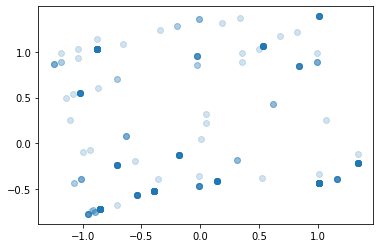

In [20]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

X = np.array(onehot_hl_li)

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

print('explained variance ratio: %s'
      % str(pca.explained_variance_ratio_))

plt.figure()
plt.scatter(X_r[:, 0], X_r[:, 1], alpha=.2)
plt.show()

#UPGMA

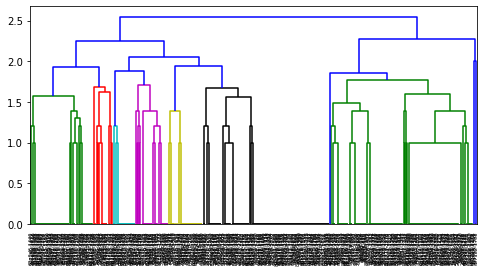

In [21]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(8,4))

X = np.array(onehot_hl_li)
Z = sch.linkage(X, method = 'weighted') # X is a 2d array of observation vectors.
dn = sch.dendrogram(Z, labels = sn_list, orientation = 'top')

plt.show()

#Dot matrix

In [22]:
def createDotMatrix(hl):
  n = len(hl)

  x = hl.li
  y = hl.li

  matched = [[0 for j in range(n)] for i in range(n)]
  for i, t_api_x in enumerate(x):
    for j, t_api_y in enumerate(y):
      if hl.par == True:
        api_x = t_api_x[1] + t_api_x[2]
        api_y = t_api_y[1] + t_api_y[2]
      else:
        api_x = t_api_x[1]
        api_y = t_api_y[1]
      if api_x == api_y:
        matched[j][i] = 1.0

  return matched

In [23]:
hl = hl_list[0]
matched = createDotMatrix(hl)

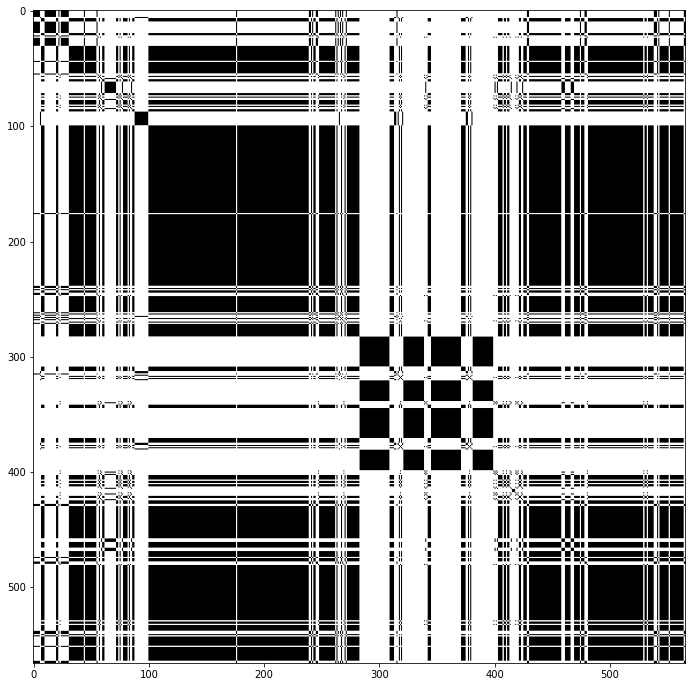

In [24]:
plt.figure(figsize=(12,12))
plt.imshow(matched, cmap='Greys')
plt.show()